<center>
<img src="https://file.mk.co.kr/meet/neds/2021/02/image_readtop_2021_169269_16138701304547187.jpeg" width="400" height="300"><br>
</center>


# ehang 이항주식 분석하기

#### 순서

- 주가데이터 받아오기

- 패키지 받아오기 

- 데이터 불러오기 

- 분석 및 데이터 전처리

- 이동평균선 계산해서 att추가하기

- ahoo Finance API는 종류가 다양하며 각 API에서 제공하는 데이터도 조금씩 다르다. 시계열 데이터 부터, 기업 재무제표를 제공하는 API등 다양하게 있다.





In [34]:
#!pip3 install yfinance --user #yfinance라는 파이썬 패키지를 사용 및 설치

#### 1 .탐색

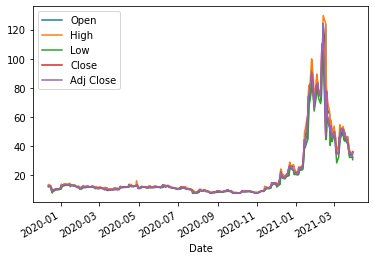

In [35]:
# 이항 데이터셋의 기본 정보 구하기


%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

eh_df = yf.download('EH', 
                      start='2019-01-01', 
                      end='2021-03-31', 
                      progress=False)
eh_df



eh_df = eh_df[["Open", "High", "Low", "Close", "Adj Close"]]


eh_df.plot()
plt.show()

In [36]:
print(eh_df.shape)
print(eh_df.info())
eh_df.tail()

(325, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 2019-12-13 to 2021-03-30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       325 non-null    float64
 1   High       325 non-null    float64
 2   Low        325 non-null    float64
 3   Close      325 non-null    float64
 4   Adj Close  325 non-null    float64
dtypes: float64(5)
memory usage: 15.2 KB
None


,Open,High,Low,Close,Adj Close
Date,,,,,
2021-03-24,39.700001,40.438000,35.160000,35.520000,35.520000
2021-03-25,33.240002,36.290001,32.180000,35.990002,35.990002
2021-03-26,36.119999,36.599998,32.349998,34.810001,34.810001
2021-03-29,34.000000,35.000000,32.320000,32.860001,32.860001
2021-03-30,32.284000,36.400002,30.740000,35.980000,35.980000


### 2.데이터확인

-  att확인

In [37]:
eh_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

(High, Low, Open, Close, Volume, Adj Close) 는  (고가, 저가, 시가, 종가, 거래량, 수정 종가)

- type확인

In [38]:
eh_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object

- describe() 메소드로 기본정보 확인

In [39]:
eh_df.describe()

,Open,High,Low,Close,Adj Close
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,19.774065,21.007985,18.318311,19.650997,19.650997
std,19.952227,22.098426,17.664908,20.012864,20.012864
min,7.980000,8.035000,7.590000,7.700000,7.700000
25%,10.000000,10.390000,9.620000,9.990000,9.990000
50%,11.980000,12.230000,11.510000,11.790000,11.790000
75%,14.330000,14.980000,13.360000,13.750000,13.750000
max,123.497002,129.800003,103.800003,124.089996,124.089996


컬럼별로 데이터의 개수(count), 데이터의 평균값(mean), 표준 편차(std), 최솟값(min), 4분위수(25%, 50%, 75%), 그리고 최댓값(max)들의 정보 확인

### 3.이동평균선 계산해서 att추가하기

(1) 종가를 이용한 이동평균선 계산, 추가

-  이동평균선은 주식값 예측에 중요한 역할을 한다고 한다. 

- 단기이동평균선이 장기이동평균선을 넘으면 "골든크로스"라고 한다. 자기가 투자하는 주식이 "골든크로스" 이길 바랄것이다.
 (최근 주식값이 예전꺼보다 높다 로 해석할수있다. 곧,  주식이 오르고 있다.)

In [40]:
# maN : N일전부터 현재까지의 수정종가 평균
ma5 = eh_df['Adj Close'].rolling(window=5).mean()
ma20 = eh_df['Adj Close'].rolling(window=20).mean()
ma60 = eh_df['Adj Close'].rolling(window=60).mean()
ma120 = eh_df['Adj Close'].rolling(window=120).mean()

#새로운 데이터를 삽입하는 코드
eh_df.insert(len(eh_df.columns), "MA5", ma5)
eh_df.insert(len(eh_df.columns), "MA20", ma20)
eh_df.insert(len(eh_df.columns), "MA60", ma60)
eh_df.insert(len(eh_df.columns), "MA120", ma120)

(2) 거래량을 이용한 이동평균선 계산, 추가

In [68]:
vma5 = eh_df['Volume'].rolling(window=5).mean()
eh_df.insert(len(df.columns), "VMA5", vma5)
eh_df = eh_df[["Open", "High", "Low", "Close", "Adj Close"]] # 추가 코드를 입력하여도 같은 에러 발생...


KeyError: 'Volume'

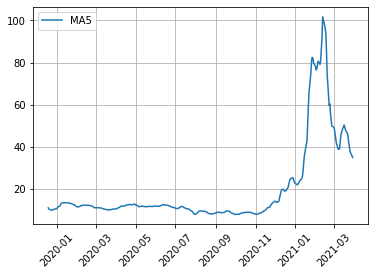

In [42]:
#이동평균값 plot 그리기
plt.plot(eh_df.index,eh_df['MA5'], label="MA5")
plt.legend(loc='best') #라벨 위치 설정
plt.xticks(rotation=45) #x축 좌표각도
plt.grid() #격자
plt.show() #현재까지 그려진 그래프 보여주기

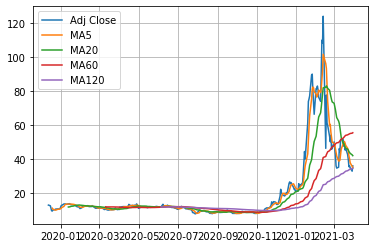

In [43]:
#차트에 표현할 요소 설정
plt.plot(eh_df['Adj Close'], label="Adj Close")
plt.plot(eh_df['MA5'], label="MA5")
plt.plot(eh_df['MA20'], label="MA20")
plt.plot(eh_df['MA60'], label="MA60")
plt.plot(eh_df['MA120'], label="MA120")

#'best'를 인자로 주어 가장 적절한 자리에 위치하게 함
plt.legend(loc='best')

#격자 그리기
plt.grid()
plt.show()

### 4.주가변동율 추가 및 시각화

#### (1)변동율 추가

In [63]:
# x일 행에 x+1일의 종가를 추가
eh_df['tomorrow Adj Close']= eh_df['Adj Close'].shift(-1)

# 변동율 측정 => ((다음날종가)-(오늘종가))/오늘종가 
eh_df['Fluctuation']= eh_df['tomorrow Adj Close']-eh_df['Adj Close']
eh_df['Fluctuation Rate']= eh_df['Fluctuation']/eh_df['Adj Close']
eh_df

,Open,High,Low,Close,Adj Close,MA5,MA20,MA60,MA120,tomorrow Adj Close,Fluctuation,Fluctuation Rate
Date,,,,,,,,,,,,
2019-12-13,12.450000,13.700000,12.120000,12.900000,12.900000,NaN,NaN,NaN,NaN,12.500000,-0.400000,-0.031008
2019-12-16,12.900000,13.200000,12.110000,12.500000,12.500000,NaN,NaN,NaN,NaN,11.070000,-1.430000,-0.114400
2019-12-17,12.500000,12.643000,11.000000,11.070000,11.070000,NaN,NaN,NaN,NaN,9.520000,-1.549999,-0.140018
2019-12-18,11.190000,11.190000,9.040000,9.520000,9.520000,NaN,NaN,NaN,NaN,9.400000,-0.120001,-0.012605
2019-12-19,9.440000,9.490000,7.840000,9.400000,9.400000,11.078000,NaN,NaN,NaN,10.000000,0.600000,0.063830
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-24,39.700001,40.438000,35.160000,35.520000,35.520000,41.932000,44.4140,54.637833,33.637958,35.990002,0.470001,0.013232
2021-03-25,33.240002,36.290001,32.180000,35.990002,35.990002,40.062000,43.9265,54.850333,33.870875,34.810001,-1.180000,-0.032787
2021-03-26,36.119999,36.599998,32.349998,34.810001,34.810001,37.762000,43.3505,55.062167,34.094292,32.860001,-1.950001,-0.056018


#### (2) 추가한 데이터로 시각화 

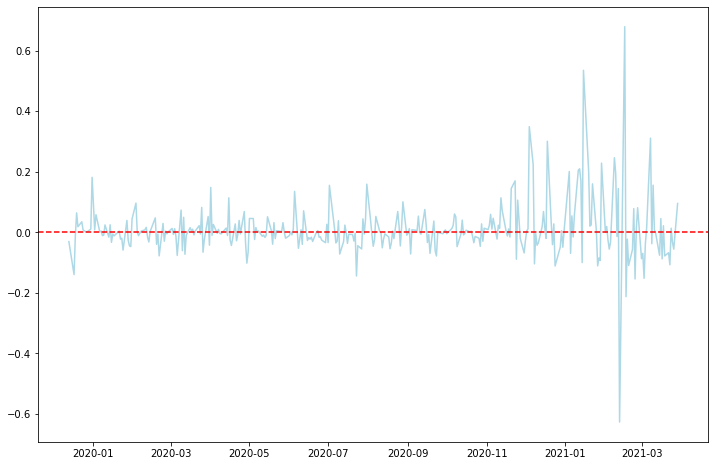

In [45]:
plt.figure(figsize=(12,8)) 
plt.plot(eh_df.index,eh_df['Fluctuation Rate'], color = 'lightblue')
plt.axhline( y = 0, color = 'red', ls = '--') #기준선추가 , axhline() 함수의 첫번째 인자는 y 값으로서 수평선의 위치가 됩니다.
plt.show()

- 이항주식의 경우 올해 ( 21년 2월 ) 엄청난 변동율 그래프가 있을것을 나는 알고 해본 것이지만 지금 시각화로만든 그래프가 경이롭다.
- 21.02.17 공매도 리포트에 주가 63% 폭락   [뉴스출처]:
(https://biz.chosun.com/site/data/html_dir/2021/02/17/2021021700991.html?utm_source=naver&utm_medium=original&utm_campaign=biz)
- 21.02.18 이항 주가 하루 만에 67% 급반등…롤러코스터 탄 서학개미 [뉴스출처]: https://www.mbn.co.kr/news/economy/4427097

- 124달러 -> 46달러 -> 77달러 .. 엄청난 변동율이다.

### 5. 변화율의 히스토그램과 커널 밀도함수


#### (1) 히스토그램



Text(0.5, 1.0, 'Fluctuation Rate Histogram')

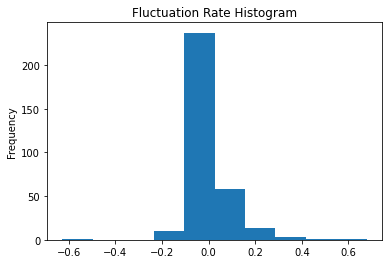

In [46]:
# 히스토그램
eh_df['Fluctuation Rate'].plot.hist()
plt.title('Fluctuation Rate Histogram')

#### (2) 커널밀도함수

Text(0.5, 1.0, 'Fluctuation Rate Histogram')

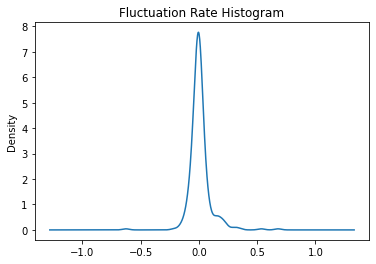

In [47]:
#커널 밀도함수
eh_df['Fluctuation Rate'].plot.kde()
plt.title('Fluctuation Rate Histogram')

### 6.봉 차트 그리기

#### (1) 라이브러리 import

In [48]:
from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt

#matplotlib에서 x축과 y축에 표시되는 값을 ticker라 함
import matplotlib.ticker as ticker 
import matplotlib.dates as mdates
import numpy as np

In [49]:
# !pip3 install mpl_finance      #mpi_finance 설치

#### (2)그래프 그리기-1

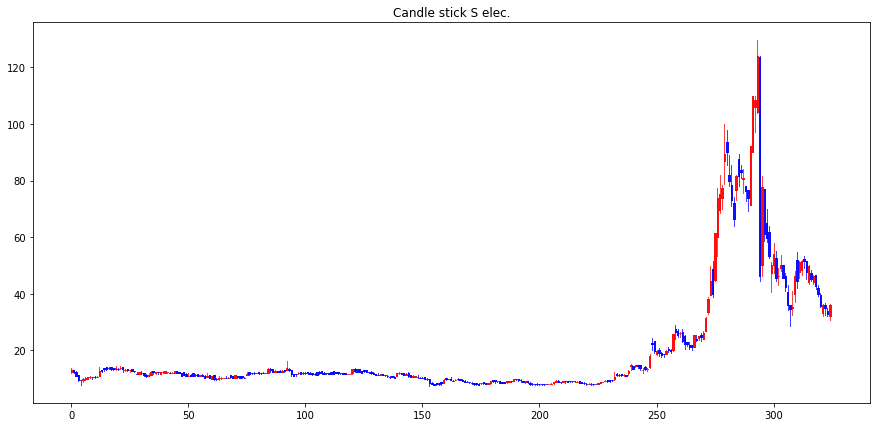

In [50]:
#차트와 피규어 그리기 준비 및 크기 설정
fig, ax = plt.subplots(figsize=(15,7)) 

# 시고저종 데이터를 통해 캔들 차트를 그리기 (순서를 반드시 시고저종으로 입력)
candlestick2_ohlc(ax,eh_df['Open'],eh_df['High'],eh_df['Low'],eh_df['Close'],width=0.6, colorup='r', colordown='b')

# 차트 타이틀 설정
plt.title('Candle stick S elec.')
plt.show()

- 캔들차트는 주식가격의 주요한 가격 정보를 담고 있습니다. 장 시작할 때의 가격인 시가, 장 중 최고 가격인 고가, 장 중 최저 가격인 저가, 장 마감 때 가격인 종가가 그것입니다. 


#### (3)그래프 그리기-2 , 적은기간으로 보기쉽게

- 데이터 추출

In [ ]:
# 데이터를 가져와 편리하게 다룰 수 있도록 PANDAS 패키지를 설치
#!pip3 install pandas_datareader

# 필요한 라이브러리 다운로드
from datetime import datetime 
import pandas_datareader.data as wb

In [58]:
start = datetime(2021,1,1) #시작날짜 
end = datetime(2021,3,2) #끝 날짜df = wb.DataReader('EH', 'yahoo' , start, end)
eh_df2 = yf.download('EH', start,end, progress=False)
                     

- 시간포멧 보기좋게 바꾸는 방법

In [59]:
#날짜 포멧을 일, 또는 연-월-일로 바꾸기 
print(eh_df2.index[0])
print(eh_df2.index[0].strftime('%d'))
print(eh_df2.index[0].strftime('%Y-%m-%d'))

2021-01-04 00:00:00
04
2021-01-04


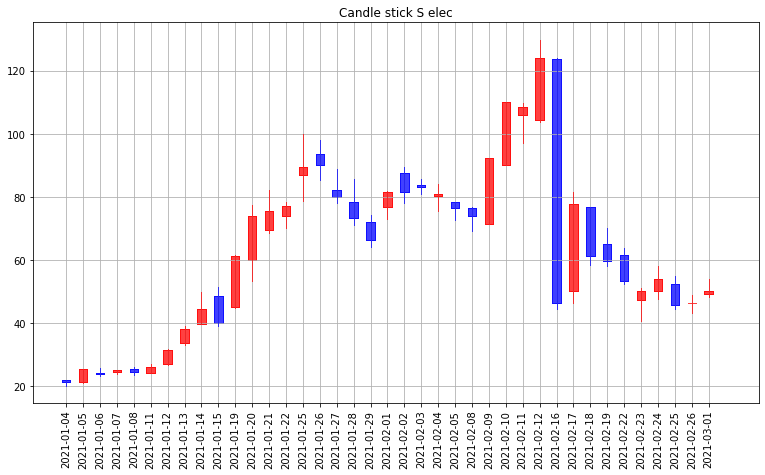

In [60]:
#다시 차트 그리기
fig, ax = plt.subplots(figsize=(13,7)) 

#x축의 눈금을 설정
day_list = []
name_list = []
for i, day in enumerate(eh_df2.index):    
    day_list.append(i) # 고정 축 list 생성
    name_list.append(day.strftime('%Y-%m-%d')) # 고정 축에 적힐 날짜 list 생성
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list)) #day_list를 받아서 리스트 안의 값의 위치에 고정 축 생성
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list)) #설정한 고정 축에 name_list 안의 값을 축에 출력

candlestick2_ohlc(ax,eh_df2['Open'],eh_df2['High'],eh_df2['Low'],eh_df2['Close'], width=0.5, colorup='r', colordown='b')

plt.xticks(rotation = 90) #x축 각도 회전
#fig.autofmt_xdate() #날짜 형식으로 자동 format 지정
plt.title('Candle stick S elec')
plt.grid()
plt.show()

### 총평

위에 그래프 ( **6-3 봉차트,적은기간보기쉽게**) 를 보자. 이것을 보기 위해 이번 블로깅을 했다고 보면 된다. 위에 **4-2 주가변동율 추가 및 시각화변동율그래프**로 예상은 했지만, 어느 정확한 날짜에 변동률이 컸는지는 알 수 없었다. 하지만 봉차트로는 날짜와 변동율을 직관적으로 볼 수 있었다. 다음 블로깅은  이항 주식 데이터 분석 - 예측하기를 해보려 한다.

- 참고블로그,출처:https://sosoeasy.tistory.com/332